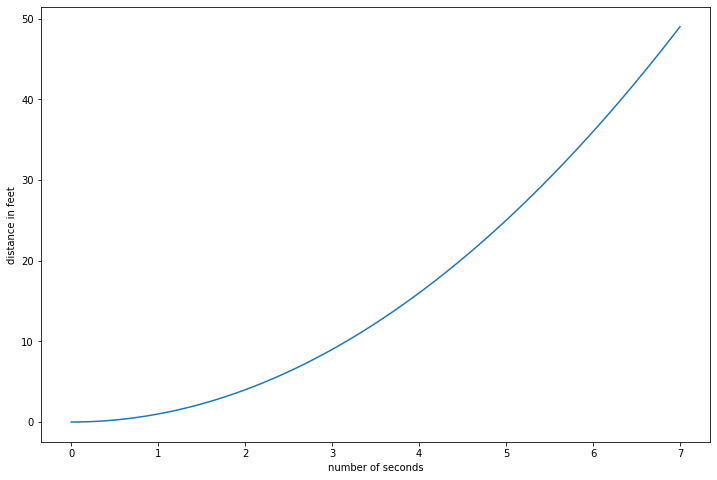

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return np.square(x)

fig,ax = plt.subplots(figsize =(12,8))
x = np.linspace(0,7,100)

plt.plot(x, f(x))
plt.ylabel('distance in feet')
plt.xlabel('number of seconds')
plt.show()

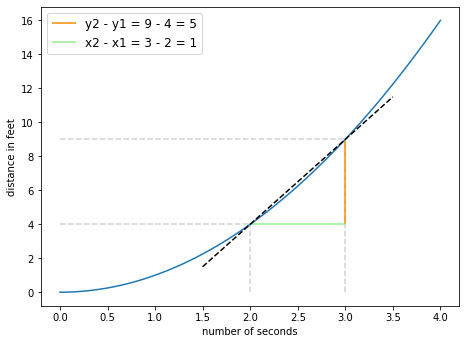

In [5]:
def f(x):
    return np.square(x)

fig, ax = plt.subplots(figsize=(7.5,5.5))

x = np.linspace(0, 4, 100)

plt.plot(x, f(x))

plt.hlines(y=9, xmin=0, xmax=3, linestyle = "dashed", color= 'lightgrey')
plt.vlines(x=2, ymin=0, ymax=4, linestyle = "dashed", color= 'lightgrey')
plt.hlines(y=4, xmin=0, xmax=2, linestyle = "dashed", color= 'lightgrey')
plt.vlines(x=3, ymin=0, ymax=9, linestyle = "dashed", color= 'lightgrey')


plt.vlines(x=3, ymin=4, ymax=9, color="darkorange", label = "y2 - y1 = 9 - 4 = 5")
plt.hlines(y=4, xmin=2, xmax=3, color="lightgreen", label = "x2 - x1 = 3 - 2 = 1")

x_dev = np.linspace(1.5,3.5,100)
a =2
delta_a = 1
fprime =(f(a+delta_a)- f(a))/delta_a
tan = f(a) +fprime*(x_dev -a)

plt.plot(x_dev, tan, color = "black", linestyle="dashed")

ax.legend(loc='upper left', fontsize='large')

plt.ylabel("distance in feet")
plt.xlabel("number of seconds")
plt.show()

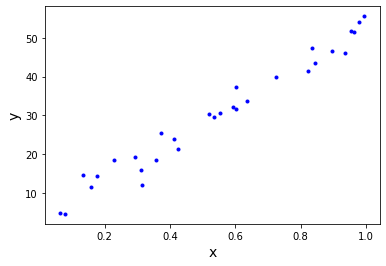

In [7]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(225)

x = np.random.rand(30,1).reshape(30)
y_randterm = np.random.normal(0,3,30)
y = 3+ 50*x + y_randterm
plt.plot(x, y, '.b')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14);

In [8]:
data = np.array([x,y])

In [9]:
data

array([[ 0.29216568,  0.53515541,  0.22986847,  0.37369828,  0.59263667,
         0.89534424,  0.6012541 ,  0.42379558,  0.07920494,  0.95270628,
         0.13253938,  0.9616459 ,  0.84271654,  0.97959984,  0.15837217,
         0.82229854,  0.93400058,  0.31009099,  0.51921673,  0.55387843,
         0.99478628,  0.41208054,  0.35608238,  0.60338337,  0.31308169,
         0.83530716,  0.72474695,  0.0634837 ,  0.17764152,  0.63454142],
       [19.36290551, 29.59285863, 18.4055909 , 25.53551583, 32.08944895,
        46.52243403, 37.3284985 , 21.18019425,  4.54631099, 51.86210027,
        14.71971715, 51.39462351, 43.38878799, 54.09968372, 11.51152403,
        41.33001422, 46.1540494 , 16.01381272, 30.25694214, 30.69934367,
        55.58458869, 23.81015258, 18.3653227 , 31.5985852 , 12.02118019,
        47.3639126 , 39.90827867,  4.78193393, 14.39162447, 33.68931643]])

In [11]:
from linear_equations import build_regression_line

ModuleNotFoundError: No module named 'linear_equations'

In [12]:
residual_sum_squares(x,y,54,1.319)

NameError: name 'residual_sum_squares' is not defined

In [ ]:
table = np.zeros((20,2))
for idx, val in enumerate(range(40,60)):
    table[idx,0] = val
    table[idx,1] = residual_sum_squares(x,y,val,1.319)

In [20]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


In [78]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id', 'ri', 'na', 'mg', 'al',
             'si', 'k', 'ca', 'ba', 'fe', 'glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')

In [79]:
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [80]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
ri            214 non-null float64
na            214 non-null float64
mg            214 non-null float64
al            214 non-null float64
si            214 non-null float64
k             214 non-null float64
ca            214 non-null float64
ba            214 non-null float64
fe            214 non-null float64
glass_type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


In [81]:
X = glass['ri']

In [85]:
X.isna().sum()

0

In [82]:
y = glass['al']

In [114]:
linreg_norm = LinearRegression()
model = linreg_norm.fit(X.values.reshape(-1,1), y)
model.predict(np.array([[2]]))

array([[-8.85949166]])

In [115]:
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
id,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


Text(0, 0.5, 'household')

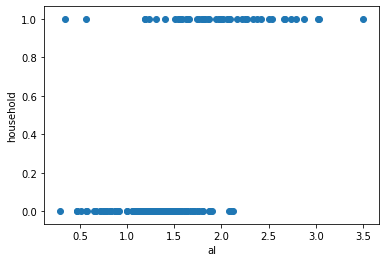

In [116]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

In [123]:
glass.sort_values(by = 'al', inplace = True)

In [124]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9, solver = 'lbfgs')
feature_cols= glass[['al']]
y = glass['household']
model = logreg.fit(feature_cols,y)

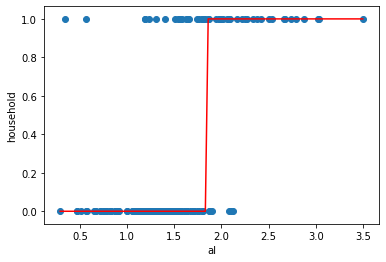

In [125]:
plt.scatter(glass[['al']], glass['household'])
plt.plot(glass[['al']], model.predict(feature_cols), color='red')
plt.xlabel('al')
plt.ylabel('household')
plt.show()

In [126]:
import matplotlib.pyplot as plt
import numpy as np
def regression_formula(x):
    return 1.8 + 46*x

np.random.seed(225)
x = np.random.rand(30,1).reshape(30)
y_randterm = np.random.normal(0,3,30)
y = 3 + 50*x + y_randterm

plt.figure(figsize =(7,5))
plt.plot(x,y, '.b')
plt.plot(x,regreession(x), '-', color ='red')
plt.xlabel('x', fontsize =14)
plt.ylabel('y', fontsize =14)

SyntaxError: unexpected EOF while parsing (<ipython-input-126-1d04742db68c>, line 3)

In [127]:
def step_gradient(b_current, m_current, points):
    b_gradient = 0
    m_gradient = 0
    learning_rate = .1
    N = float(len(points))
    for i in range(0,len(points)):
        x = points[i][1]
        y = points[i][0]
        b_gradient += -(1/N) * (y - (m_current * x + b_current))
        m_gradient += -(1/N) * x * (y - (m_current * x  + b_current))
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate  * m_gradient)
    return (new_b, new_m)

np.array([[2, 3],
       [0, 4]])

In [128]:
x = np.array([[1,2,3],
             [0,0,1]])

In [129]:
x

array([[1, 2, 3],
       [0, 0, 1]])

In [ ]:
ex2_labels = [0, 1, 2, 2, 3, 1, 0, 2, 1, 2, 3, 3, 1, 0]
ex2_preds =  [0, 1, 1, 2, 3, 3, 2, 2, 1, 2, 3, 0, 2, 0]

In [130]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [131]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [133]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [135]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [136]:
one_hot_df = pd.get_dummies(df)
one_hot_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [138]:
labels = one_hot_df['Outcome']
one_hot_df.drop('Outcome', axis=1, inplace=True)

In [141]:
one_hot_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [142]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(one_hot_df, labels, test_size=0.25, random_state=42)

In [150]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate StandardScaler
scaler = MinMaxScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=one_hot_df.columns)
scaled_df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.764706,0.648241,0.000000,0.476190,0.000000,0.594635,0.209650,0.383333
1,0.235294,0.648241,0.704918,0.317460,0.319149,0.523100,0.065329,0.033333
2,0.176471,0.306533,0.672131,0.444444,0.000000,0.512668,0.070453,0.416667
3,0.117647,0.407035,0.590164,0.238095,0.089835,0.448584,0.200256,0.066667
4,0.000000,0.512563,0.614754,0.365079,0.000000,0.000000,0.210931,0.000000


In [160]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)
print(test_preds[:5])

[0 0 0 1 1]


In [161]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score

In [162]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    print("ROC-AUC Score: {}".format(roc_auc_score(labels, preds)))

In [163]:
print_metrics(y_test, test_preds)

Precision Score: 0.5522388059701493
Recall Score: 0.5362318840579711
Accuracy Score: 0.6770833333333334
F1 Score: 0.5441176470588235
ROC-AUC Score: 0.6461647225167905


In [168]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        roc = roc_auc_score(y_test,preds)
        if roc > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("best roc score: {}".format(best_score))
  

In [169]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

Best Value for k: 25
best roc score: 0.5333333333333333
